In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display_html
from IPython.display import Image

def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)
%matplotlib inline

# Datasource: git clone https://github.com/owid/covid-19-data.git
# dataset paths
covid_csv = r'C:\COVID-19 Singapore\public\data\owid-covid-data.csv'

In [2]:
# Load csv and transform date
covid_df = pd.read_csv(covid_csv,encoding='utf8')
covid_df['date'] = covid_df['date'].apply(lambda x: pd.to_datetime(x))
covid_df.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
0,ABW,Aruba,2020-03-13,2,2,0,0,18.733,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
1,ABW,Aruba,2020-03-20,4,2,0,0,37.465,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
2,ABW,Aruba,2020-03-24,12,8,0,0,112.395,74.930,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
3,ABW,Aruba,2020-03-25,17,5,0,0,159.227,46.831,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
4,ABW,Aruba,2020-03-26,19,2,0,0,177.959,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN


In [3]:
# create multiple datasets by country of interest
covid_sg = covid_df[covid_df['iso_code']=="SGP"]
covid_kr = covid_df[covid_df['iso_code']=="KOR"]
covid_jp = covid_df[covid_df['iso_code']=="JPN"]
covid_sg.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
17214,SGP,Singapore,2019-12-31,0,0,0,0,0.0,0.0,0.0,...,12.922,7.049,85535.383,NaN,92.243,10.99,5.2,28.3,NaN,2.4
17215,SGP,Singapore,2020-01-01,0,0,0,0,0.0,0.0,0.0,...,12.922,7.049,85535.383,NaN,92.243,10.99,5.2,28.3,NaN,2.4
17216,SGP,Singapore,2020-01-02,0,0,0,0,0.0,0.0,0.0,...,12.922,7.049,85535.383,NaN,92.243,10.99,5.2,28.3,NaN,2.4
17217,SGP,Singapore,2020-01-03,0,0,0,0,0.0,0.0,0.0,...,12.922,7.049,85535.383,NaN,92.243,10.99,5.2,28.3,NaN,2.4
17218,SGP,Singapore,2020-01-04,0,0,0,0,0.0,0.0,0.0,...,12.922,7.049,85535.383,NaN,92.243,10.99,5.2,28.3,NaN,2.4


In [4]:
# Log transform variables of interest
covid_sg['lg_total_cases'] = covid_sg['total_cases'].apply(lambda x: np.log(x) if x > 0 else x)
covid_sg['lg_new_cases'] = covid_sg['new_cases'].apply(lambda x: np.log(x) if x > 0 else x)
covid_kr['lg_total_cases'] = covid_kr['total_cases'].apply(lambda x: np.log(x) if x > 0 else x)
covid_kr['lg_new_cases'] = covid_kr['new_cases'].apply(lambda x: np.log(x) if x > 0 else x)
covid_jp['lg_total_cases'] = covid_jp['total_cases'].apply(lambda x: np.log(x) if x > 0 else x)
covid_jp['lg_new_cases'] = covid_jp['new_cases'].apply(lambda x: np.log(x) if x > 0 else x)

C:\Users\ssptit\AppData\Local\Continuum\anaconda3\envs\deeplearn\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ssptit\AppData\Local\Continuum\anaconda3\envs\deeplearn\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ssptit\AppData\Local\Continuum\anaconda3\envs\deeplearn\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWa

In [5]:
covid_sg.set_index('date')

,iso_code,location,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,...,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k,lg_total_cases,lg_new_cases
date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,SGP,Singapore,0,0,0,0,0.000,0.000,0.000,0.0,...,85535.383,NaN,92.243,10.99,5.2,28.3,NaN,2.4,0.000000,0.000000
2020-01-01,SGP,Singapore,0,0,0,0,0.000,0.000,0.000,0.0,...,85535.383,NaN,92.243,10.99,5.2,28.3,NaN,2.4,0.000000,0.000000
2020-01-02,SGP,Singapore,0,0,0,0,0.000,0.000,0.000,0.0,...,85535.383,NaN,92.243,10.99,5.2,28.3,NaN,2.4,0.000000,0.000000
2020-01-03,SGP,Singapore,0,0,0,0,0.000,0.000,0.000,0.0,...,85535.383,NaN,92.243,10.99,5.2,28.3,NaN,2.4,0.000000,0.000000
2020-01-04,SGP,Singapore,0,0,0,0,0.000,0.000,0.000,0.0,...,85535.383,NaN,92.243,10.99,5.2,28.3,NaN,2.4,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-28,SGP,Singapore,32876,533,23,0,5619.500,91.106,3.931,0.0,...,85535.383,NaN,92.243,10.99,5.2,28.3,NaN,2.4,10.400498,6.278521
2020-05-29,SGP,Singapore,33249,373,23,0,5683.257,63.757,3.931,0.0,...,85535.383,NaN,92.243,10.99,5.2,28.3,NaN,2.4,10.411780,5.921578
2020-05-30,SGP,Singapore,33860,611,23,0,5787.695,104.438,3.931,0.0,...,85535.383,NaN,92.243,10.99,5.2,28.3,NaN,2.4,10.429990,6.415097


In [6]:
# Get points where circuit breaker started, extended and ended
cb_start = covid_sg.set_index('date').loc['2020-04-07'].total_cases
cb_extended = covid_sg.set_index('date').loc['2020-05-04'].total_cases
cb_end = covid_sg.set_index('date').loc['2020-06-01'].total_cases
cb_lg_start = covid_sg.set_index('date').loc['2020-04-07'].lg_total_cases
cb_lg_extended = covid_sg.set_index('date').loc['2020-05-04'].lg_total_cases
cb_lg_end = covid_sg.set_index('date').loc['2020-06-01'].lg_total_cases

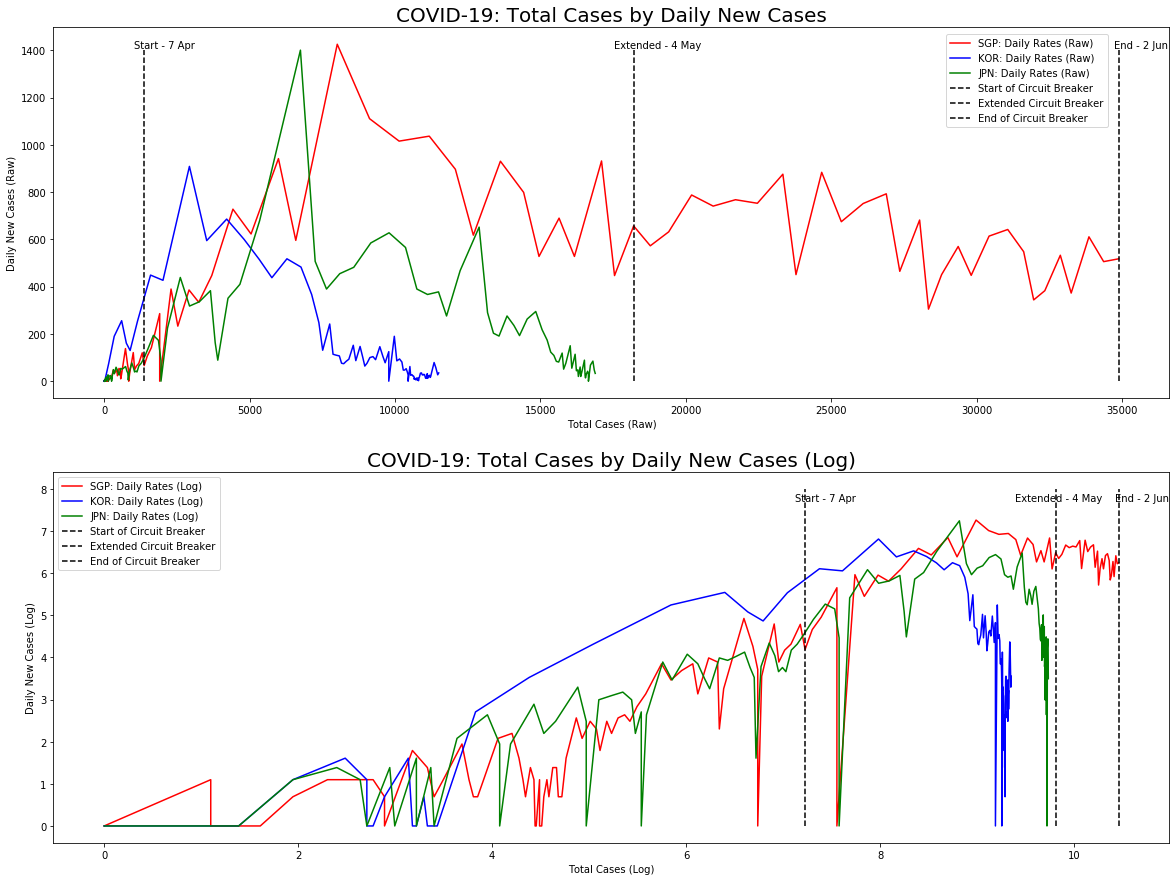

In [7]:
fig, axes = plt.subplots(figsize=(20,15),nrows=2,ncols=1)
# fig.suptitle("COVID-19: Total Cases by Daily New Cases",size=28)

# Plot curves
axes[0].plot(covid_sg['total_cases'],covid_sg['new_cases'],'r',label="SGP: Daily Rates (Raw)")
axes[0].plot(covid_kr['total_cases'],covid_kr['new_cases'],'b',label="KOR: Daily Rates (Raw)")
axes[0].plot(covid_jp['total_cases'],covid_jp['new_cases'],'g',label="JPN: Daily Rates (Raw)")

# Plot test cases
# ax1 = axes[0].twinx()
# ax1.plot(covid_sg['total_cases'],covid_sg['new_tests_smoothed_per_thousand'],'-.r',label="SGP: New Tests Smoothed Per Thousand")
# ax1.plot(covid_kr['total_cases'],covid_kr['new_tests_smoothed_per_thousand'],'-.b',label="KOR: New Tests Smoothed Per Thousand")
# ax1.plot(covid_jp['total_cases'],covid_jp['new_tests_smoothed_per_thousand'],'-.g',label="JPN: New Tests Smoothed Per Thousand")

# Create reference lines
axes[0].plot([cb_start,cb_start],[0,1400],'--k',label="Start of Circuit Breaker")
axes[0].annotate("Start - 7 Apr",(cb_start,cb_start),textcoords="offset points",xytext=(-10,8))
axes[0].plot([cb_extended,cb_extended],[0,1400],'--k',label="Extended Circuit Breaker")
axes[0].annotate("Extended - 4 May",(cb_start,cb_start),textcoords="offset points",xytext=(470,8))
axes[0].plot([cb_end,cb_end],[0,1400],'--k',label="End of Circuit Breaker")
axes[0].annotate("End - 2 Jun",(cb_start,cb_start),textcoords="offset points",xytext=(970,8))

# Plot
axes[0].set_xlabel('Total Cases (Raw)')
axes[0].set_ylabel('Daily New Cases (Raw)')
axes[0].set_title('COVID-19: Total Cases by Daily New Cases',size=20)
# ax1.set_ylabel('New Tests Smoothed Per Thousand')
axes[0].legend(loc=(0.80,0.73))
# ax1.legend(loc=(0.78,0.60))

# Plot curves
axes[1].plot(covid_sg['lg_total_cases'],covid_sg['lg_new_cases'],'r',label="SGP: Daily Rates (Log)")
axes[1].plot(covid_kr['lg_total_cases'],covid_kr['lg_new_cases'],'b',label="KOR: Daily Rates (Log)")
axes[1].plot(covid_jp['lg_total_cases'],covid_jp['lg_new_cases'],'g',label="JPN: Daily Rates (Log)")

# Create reference lines
axes[1].plot([cb_lg_start,cb_lg_start],[0,8],'--k',label="Start of Circuit Breaker")
axes[1].annotate("Start - 7 Apr",(cb_lg_start,cb_lg_start),textcoords="offset points",xytext=(-10,20))
axes[1].plot([cb_lg_extended,cb_lg_extended],[0,8],'--k',label="Extended Circuit Breaker")
axes[1].annotate("Extended - 4 May",(cb_lg_start,cb_lg_start),textcoords="offset points",xytext=(210,20))
axes[1].plot([cb_lg_end,cb_lg_end],[0,8],'--k',label="End of Circuit Breaker")
axes[1].annotate("End - 2 Jun",(cb_lg_start,cb_lg_start),textcoords="offset points",xytext=(310,20))

# Plot
axes[1].set_xlabel('Total Cases (Log)')
axes[1].set_ylabel('Daily New Cases (Log)')
axes[1].set_title('COVID-19: Total Cases by Daily New Cases (Log)',size=20)
axes[1].legend()

In [8]:
# Data prep for SGP

# Add week number
covid_sg['week_no'] = covid_sg['date'].apply(lambda x: x.week)

# Group by week number
covid_sg_groupby = covid_sg.groupby("week_no")

# Get last instances of by-groups
weekly_covid_sg = covid_sg_groupby.last()

# Calculate weekly averages (NOTE: SG does not have daily test rates per thousand, only a weekly rate)
weekly_average = []
for i in range(1,len(covid_sg_groupby.size())+1):
    weekly_average.append(round(covid_sg_groupby.get_group(i).mean().new_cases,2))

# Create weekly average column
weekly_covid_sg['weekly_average'] = weekly_average

# log transform total cases and weekly average
weekly_covid_sg['lg_total_cases'] = weekly_covid_sg['total_cases'].apply(lambda x: np.log(x) if x > 0 else x)
weekly_covid_sg['lg_weekly_average'] = weekly_covid_sg['weekly_average'].apply(lambda x: np.log(x) if x > 0 else x)

# Data prep for KOR

# Add week number
covid_kr['week_no'] = covid_kr['date'].apply(lambda x: x.week)

# Group by week number
covid_kr_groupby = covid_kr.groupby("week_no")

# Get last instances of by-groups
weekly_covid_kr = covid_kr_groupby.last()

# Calculate weekly averages
weekly_average = []
weekly_average_tests = [] # calculate average weekly test rates for comparison with SG
for i in range(1,len(covid_kr_groupby.size())+1):
    weekly_average.append(round(covid_kr_groupby.get_group(i).mean().new_cases,2))
    weekly_average_tests.append(round(covid_kr_groupby.get_group(i).mean().total_tests_per_thousand,2))

# Create weekly average column
weekly_covid_kr['weekly_average'] = weekly_average
weekly_covid_kr['weekly_average_tests'] = weekly_average_tests

# log transform total cases and weekly average
weekly_covid_kr['lg_total_cases'] = weekly_covid_kr['total_cases'].apply(lambda x: np.log(x) if x > 0 else x)
weekly_covid_kr['lg_weekly_average'] = weekly_covid_kr['weekly_average'].apply(lambda x: np.log(x) if x > 0 else x)

# Data prep for JPN

# Add week number
covid_jp['week_no'] = covid_jp['date'].apply(lambda x: x.week)

# Group by week number
covid_jp_groupby = covid_jp.groupby("week_no")

# Get last instances of by-groups
weekly_covid_jp = covid_jp_groupby.last()

# Calculate weekly averages
weekly_average = []
weekly_average_tests = [] # calculate average weekly test rates for comparison with SG
for i in range(1,len(covid_jp_groupby.size())+1):
    weekly_average.append(round(covid_jp_groupby.get_group(i).mean().new_cases,2))
    weekly_average_tests.append(round(covid_jp_groupby.get_group(i).mean().total_tests_per_thousand,2))

# Create weekly average column
weekly_covid_jp['weekly_average'] = weekly_average
weekly_covid_jp['weekly_average_tests'] = weekly_average_tests

# log transform total cases and weekly average
weekly_covid_jp['lg_total_cases'] = weekly_covid_jp['total_cases'].apply(lambda x: np.log(x) if x > 0 else x)
weekly_covid_jp['lg_weekly_average'] = weekly_covid_jp['weekly_average'].apply(lambda x: np.log(x) if x > 0 else x)

display_side_by_side(weekly_covid_sg.head(),weekly_covid_jp.head(),weekly_covid_kr.head())

C:\Users\ssptit\AppData\Local\Continuum\anaconda3\envs\deeplearn\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\ssptit\AppData\Local\Continuum\anaconda3\envs\deeplearn\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ssptit\AppData\Local\Continuum\anaconda3\envs\deeplearn\lib\site-packages\ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a co

iso_code 
 location 
 date 
 total_cases 
 new_cases 
 total_deaths 
 new_deaths 
 total_cases_per_million 
 new_cases_per_million 
 total_deaths_per_million 
 new_deaths_per_million 
 total_tests 
 new_tests 
 total_tests_per_thousand 
 new_tests_per_thousand 
 new_tests_smoothed 
 new_tests_smoothed_per_thousand 
 tests_units 
 stringency_index 
 population 
 population_density 
 median_age 
 aged_65_older 
 aged_70_older 
 gdp_per_capita 
 extreme_poverty 
 cvd_death_rate 
 diabetes_prevalence 
 female_smokers 
 male_smokers 
 handwashing_facilities 
 hospital_beds_per_100k 
 lg_total_cases 
 lg_new_cases 
 weekly_average 
 lg_weekly_average 
 
 
 week_no 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 1 
 SGP 
 Singapore 
 2020-01-05 
 0 
 0 
 0 
 0 
 0.000 
 0.000 
 0.0 
 0.0 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 13.89 
 5850343.0 
 7915.731 
 42.4 
 12.922 
 7.049 
 85535.383 
 NaN 
 92.243 
 10.99 
 5.2 
 28.3 
 NaN 
 2.4 
 0.000000 
 0.000000 
 0.00 
 0.000000 
 
 
 2 
 SGP 
 Singapore 
 2020-01-12 
 0 
 0 
 0 
 0 
 0.000 
 0.000 
 0.0 
 0.0 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 13.89 
 5850343.0 
 7915.731 
 42.4 
 12.922 
 7.049 
 85535.383 
 NaN 
 92.243 
 10.99 
 5.2 
 28.3 
 NaN 
 2.4 
 0.000000 
 0.000000 
 0.00 
 0.000000 
 
 
 3 
 SGP 
 Singapore 
 2020-01-19 
 0 
 0 
 0 
 0 
 0.000 
 0.000 
 0.0 
 0.0 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 13.89 
 5850343.0 
 7915.731 
 42.4 
 12.922 
 7.049 
 85535.383 
 NaN 
 92.243 
 10.99 
 5.2 
 28.3 
 NaN 
 2.4 
 0.000000 
 0.000000 
 0.00 
 0.000000 
 
 
 4 
 SGP 
 Singapore 
 2020-01-26 
 4 
 1 
 0 
 0 
 0.684 
 0.171 
 0.0 
 0.0 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 19.44 
 5850343.0 
 7915.731 
 42.4 
 12.922 
 7.049 
 85535.383 
 NaN 
 92.243 
 10.99 
 5.2 
 28.3 
 NaN 
 2.4 
 1.386294 
 0.000000 
 0.57 
 -0.562119 
 
 
 5 
 SGP 
 Singapore 
 2020-02-02 
 18 
 2 
 0 
 0 
 3.077 
 0.342 
 0.0 
 0.0 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 19.44 
 5850343.0 
 7915.731 
 42.4 
 12.922 
 7.049 
 85535.383 
 NaN 
 92.243 
 10.99 
 5.2 
 28.3 
 NaN 
 2.4 
 2.890372 
 0.693147 
 2.00 
 0.693147 
 
 
 
 
 
 
 iso_code 
 location 
 date 
 total_cases 
 new_cases 
 total_deaths 
 new_deaths 
 total_cases_per_million 
 new_cases_per_million 
 total_deaths_per_million 
 new_deaths_per_million 
 total_tests 
 new_tests 
 total_tests_per_thousand 
 new_tests_per_thousand 
 new_tests_smoothed 
 new_tests_smoothed_per_thousand 
 tests_units 
 stringency_index 
 population 
 population_density 
 median_age 
 aged_65_older 
 aged_70_older 
 gdp_per_capita 
 extreme_poverty 
 cvd_death_rate 
 diabetes_prevalence 
 female_smokers 
 male_smokers 
 handwashing_facilities 
 hospital_beds_per_100k 
 lg_total_cases 
 lg_new_cases 
 weekly_average 
 weekly_average_tests 
 lg_weekly_average 
 
 
 week_no 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 1 
 JPN 
 Japan 
 2020-01-05 
 0 
 0 
 0 
 0 
 0.000 
 0.000 
 0.0 
 0.0 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 0.00 
 126476458.0 
 347.778 
 48.2 
 27.049 
 18.493 
 39002.223 
 NaN 
 79.37 
 5.72 
 11.2 
 33.7 
 NaN 
 13.05 
 0.000000 
 0.000000 
 0.00 
 NaN 
 0.000000 
 
 
 2 
 JPN 
 Japan 
 2020-01-12 
 0 
 0 
 0 
 0 
 0.000 
 0.000 
 0.0 
 0.0 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 2.78 
 126476458.0 
 347.778 
 48.2 
 27.049 
 18.493 
 39002.223 
 NaN 
 79.37 
 5.72 
 11.2 
 33.7 
 NaN 
 13.05 
 0.000000 
 0.000000 
 0.00 
 NaN 
 0.000000 
 
 
 3 
 JPN 
 Japan 
 2020-01-19 
 1 
 0 
 0 
 0 
 0.008 
 0.000 
 0.0 
 0.0 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 2.78 
 126476458.0 
 347.778 
 48.2 
 27.049 
 18.493 
 39002.223 
 NaN 
 79.37 
 5.72 
 11.2 
 33.7 
 NaN 
 13.05 
 0.000000 
 0.000000 
 0.14 
 NaN 
 -1.966113 
 
 
 4 
 JPN 
 Japan 
 2020-01-26 
 3 
 1 
 0 
 0 
 0.024 
 0.008 
 0.0 
 0.0 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 2.78 
 126476458.0 
 347.778 
 48.2 
 27.049 
 18.493 
 39002.223 
 NaN 
 79.37 
 5.72 
 11.2 
 3

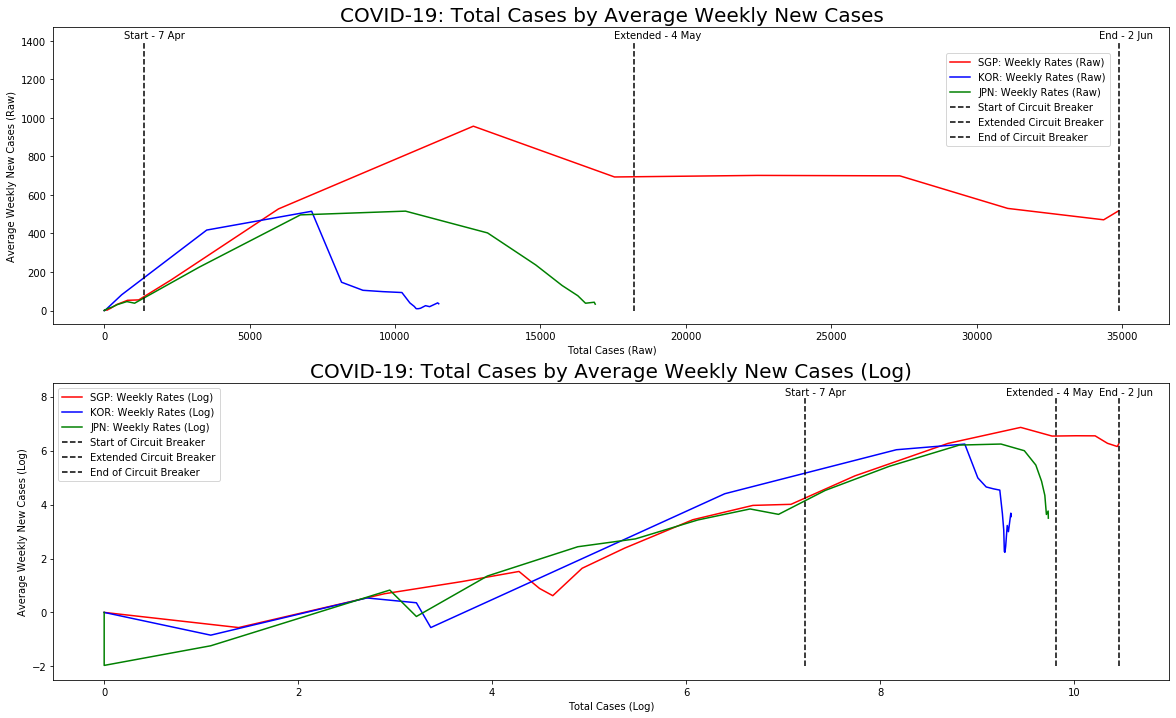

In [9]:
fig, axes = plt.subplots(figsize=(20,12),nrows=2,ncols=1)
# fig.suptitle("COVID-19: Total Cases by Average Weekly New Cases",size=28)

# Plot curves
axes[0].plot(weekly_covid_sg['total_cases'],weekly_covid_sg['weekly_average'],'r',label="SGP: Weekly Rates (Raw)")
axes[0].plot(weekly_covid_kr['total_cases'],weekly_covid_kr['weekly_average'],'b',label="KOR: Weekly Rates (Raw)")
axes[0].plot(weekly_covid_jp['total_cases'],weekly_covid_jp['weekly_average'],'g',label="JPN: Weekly Rates (Raw)")

# Create reference lines
axes[0].plot([cb_start,cb_start],[0,1400],'--k',label="Start of Circuit Breaker")
axes[0].annotate("Start - 7 Apr",(cb_start,0),textcoords="offset points",xytext=(-20,272))
axes[0].plot([cb_extended,cb_extended],[0,1400],'--k',label="Extended Circuit Breaker")
axes[0].annotate("Extended - 4 May",(cb_extended,0),textcoords="offset points",xytext=(-20,272))
axes[0].plot([cb_end,cb_end],[0,1400],'--k',label="End of Circuit Breaker")
axes[0].annotate("End - 2 Jun",(cb_end,0),textcoords="offset points",xytext=(-20,272))

# Plot
axes[0].set_xlabel('Total Cases (Raw)')
axes[0].set_ylabel('Average Weekly New Cases (Raw)')
axes[0].set_title('COVID-19: Total Cases by Average Weekly New Cases',size=20)
axes[0].legend(loc=(0.8,0.6))

# Plot curves
axes[1].plot(weekly_covid_sg['lg_total_cases'],weekly_covid_sg['lg_weekly_average'],'r',label="SGP: Weekly Rates (Log)")
axes[1].plot(weekly_covid_kr['lg_total_cases'],weekly_covid_kr['lg_weekly_average'],'b',label="KOR: Weekly Rates (Log)")
axes[1].plot(weekly_covid_jp['lg_total_cases'],weekly_covid_jp['lg_weekly_average'],'g',label="JPN: Weekly Rates (Log)")

# Create reference lines
axes[1].plot([cb_lg_start,cb_lg_start],[-2,8],'--k',label="Start of Circuit Breaker")
axes[1].annotate("Start - 7 Apr",(cb_lg_start,0),textcoords="offset points",xytext=(-20,217))
axes[1].plot([cb_lg_extended,cb_lg_extended],[-2,8],'--k',label="Extended Circuit Breaker")
axes[1].annotate("Extended - 4 May",(cb_lg_extended,0),textcoords="offset points",xytext=(-50,217))
axes[1].plot([cb_lg_end,cb_lg_end],[-2,8],'--k',label="End of Circuit Breaker")
axes[1].annotate("End - 2 Jun",(cb_lg_end,0),textcoords="offset points",xytext=(-20,217))

#plot
axes[1].set_xlabel('Total Cases (Log)')
axes[1].set_ylabel('Average Weekly New Cases (Log)')
axes[1].set_title('COVID-19: Total Cases by Average Weekly New Cases (Log)',size=20)
axes[1].legend()

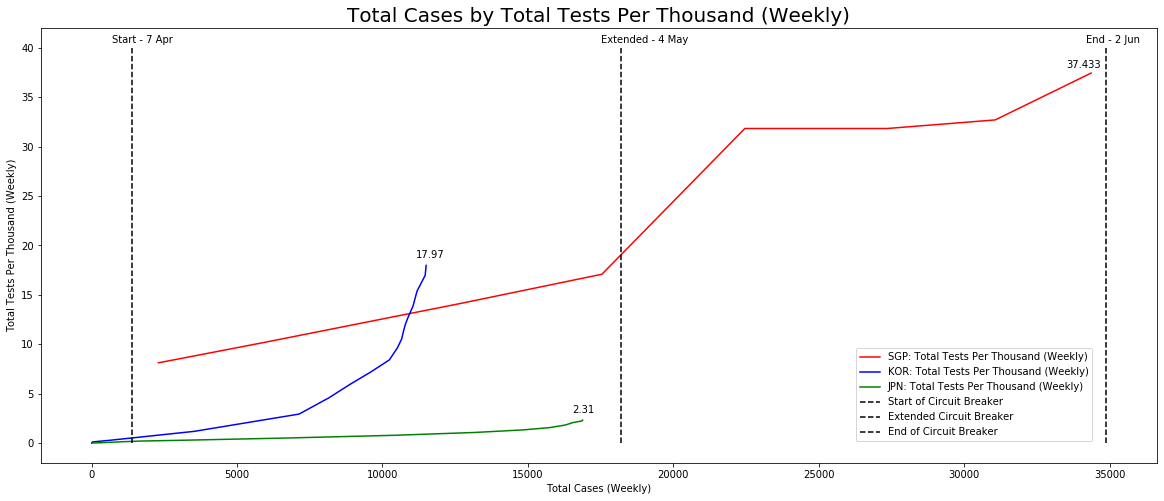

In [11]:
# Impute missing value for SG tests per thousand in week 20 with value from week 19. i.e. no new tests performed
weekly_covid_sg.loc[20,'total_tests_per_thousand']=weekly_covid_sg.loc[19,'total_tests_per_thousand']

fig,axes = plt.subplots(figsize=(20,8),nrows=1,ncols=1)

# Plot curves
axes.plot(weekly_covid_sg['total_cases'],weekly_covid_sg['total_tests_per_thousand'],'r',label="SGP: Total Tests Per Thousand (Weekly)")
axes.plot(weekly_covid_kr['total_cases'],weekly_covid_kr['weekly_average_tests'],'b',label="KOR: Total Tests Per Thousand (Weekly)")
axes.plot(weekly_covid_jp['total_cases'],weekly_covid_jp['weekly_average_tests'],'g',label="JPN: Total Tests Per Thousand (Weekly)")

# Create reference lines
axes.plot([cb_start,cb_start],[0,40],'--k',label="Start of Circuit Breaker")
axes.annotate("Start - 7 Apr",(cb_start,0),textcoords="offset points",xytext=(-20,400))
axes.plot([cb_extended,cb_extended],[0,40],'--k',label="Extended Circuit Breaker")
axes.annotate("Extended - 4 May",(cb_extended,0),textcoords="offset points",xytext=(-20,400))
axes.plot([cb_end,cb_end],[0,40],'--k',label="End of Circuit Breaker")
axes.annotate("End - 2 Jun",(cb_end,0),textcoords="offset points",xytext=(-20,400))

# Add the last reference point for total tests per thousand
axes.annotate(weekly_covid_sg['total_tests_per_thousand'].to_list()[-1],(weekly_covid_sg['total_cases'].to_list()[-1],0),textcoords="offset points",xytext=(-40,375))
axes.annotate(weekly_covid_kr['weekly_average_tests'].to_list()[-1],(weekly_covid_kr['total_cases'].to_list()[-1],0),textcoords="offset points",xytext=(-10,185))
axes.annotate(weekly_covid_jp['weekly_average_tests'].to_list()[-1],(weekly_covid_jp['total_cases'].to_list()[-1],0),textcoords="offset points",xytext=(-10,30))

# Plot
axes.set_xlabel('Total Cases (Weekly)')
axes.set_ylabel('Total Tests Per Thousand (Weekly)')
axes.set_title('Total Cases by Total Tests Per Thousand (Weekly)', size=20)
axes.legend(loc=(0.73,0.05))